<a href="https://colab.research.google.com/github/bsenst/drivendata/blob/main/DengAI_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/
# https://arxiv.org/abs/1606.07781

# Submission Format	The format that the submission to the competition must be in.
# Test Data Features The features for the testing dataset
# Training Data Features The features for the training dataset.
# Training Data Labels The number of dengue cases for each row in the training dataset.

import os
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
files = os.listdir()

labels_train = pd.read_csv(files[1])
print(labels_train.shape)
features_train = pd.read_csv(files[2])
print(features_train.shape)
submission_format = pd.read_csv(files[3])
print(submission_format.shape)
features_test = pd.read_csv(files[4])
print(features_test.shape)

(1456, 4)
(1456, 24)
(416, 4)
(416, 24)


In [31]:
labels_train

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [32]:
# https://www.google.com/search?q=Iquitos
# https://www.google.com/search?q=San+Juan

labels_train.city.unique()

array(['sj', 'iq'], dtype=object)

In [38]:
print(sum(labels_train.year == features_train.year), sum(labels_train.weekofyear == features_train.weekofyear))

1456 1456


In [39]:
features_train["week_start_date"] = pd.to_datetime(features_train["week_start_date"])
features_train["total_cases"] = labels_train["total_cases"]
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1446 non-null   float64 

In [53]:
features_train.week_start_date[features_train.city=="sj"]

0     1990-04-30
1     1990-05-07
2     1990-05-14
3     1990-05-21
4     1990-05-28
         ...    
931   2008-03-25
932   2008-04-01
933   2008-04-08
934   2008-04-15
935   2008-04-22
Name: week_start_date, Length: 936, dtype: datetime64[ns]

In [54]:
features_train.week_start_date[features_train.city=="iq"]

936    2000-07-01
937    2000-07-08
938    2000-07-15
939    2000-07-22
940    2000-07-29
          ...    
1451   2010-05-28
1452   2010-06-04
1453   2010-06-11
1454   2010-06-18
1455   2010-06-25
Name: week_start_date, Length: 520, dtype: datetime64[ns]

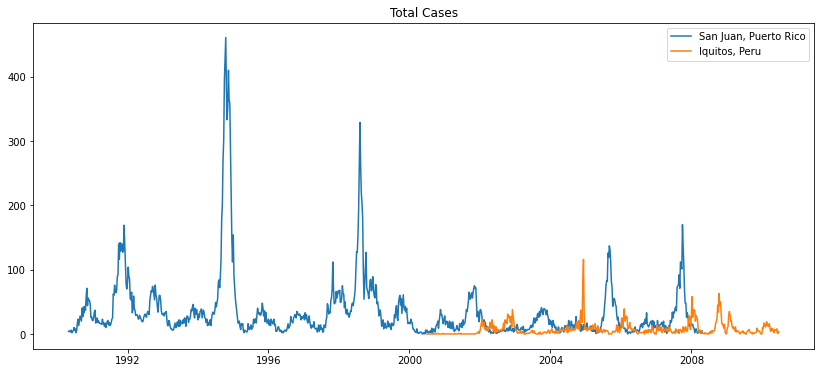

In [57]:
sj = features_train[features_train.city=="sj"]
iq = features_train[features_train.city=="iq"]

plt.figure(figsize=(14,6))
plt.plot(sj.week_start_date, sj.total_cases)
plt.plot(iq.week_start_date, iq.total_cases)
plt.title("Total Cases")
plt.legend(["San Juan, Puerto Rico", "Iquitos, Peru"])
plt.show()